In [3]:

import os
from netCDF4 import Dataset, chartostring
import pandas as pd
from datetime import datetime
from numpy import array2string
import matplotlib.pyplot as plt


nc2df_variables_dict = {'Time': 'Time',
                        'Mag_Field': 'B', 
                        'Density': 'N',
                        'Temperature': 'T', 
                        'Delta_angle': 'Delta_angle',
                        'P_dyn': 'P_dyn',
                       }

def nc2df(filepath):
    # Open the netCDF file
    data = Dataset(filepath)

    df_variables = {}
    for df_key, nc_key in nc2df_variables_dict.items():
        df_variables[df_key] = data.variables[nc_key]

    Time = df_variables['Time']

    ### DEAL WITH TIME COLUMN
    
    # 1- convert ndarra to python string
    Time = [array2string(chartostring(time[:13])) for time in Time]
    
    # 2- isolate the year day number, and add +1
    Time = [  (time[1:5], int(time[5:8])+1, time[8:10], time[10:12], time[12:14]) for time in Time]
    
    # 3- convert back to string
    Time = [ "{}{:03d}{}{}{}".format(*time) for time in Time ]
    
    # 4- parse time
    Time = [ datetime.strptime(time, "%Y%j%H%M%S") for time in Time]

    # 5- set back to dict 
    df_variables['Time'] = Time
    
    ### Create a Pandas dataframe indexed with time
    # 1- map the dict to a dataframe, like the following commented line :
    # df = pd.DataFrame({'Time': Time[:], 'Temperature': T[:], 'Density': N[:]}, 'Mag': B[:], 'P_dyn': P_dyn[:], 'DA': Delta_angle[:])
    dataframe_dict = { key: col[:] for key, col in df_variables.items()}
    df = pd.DataFrame( dataframe_dict)
    
    # time index   
    df.set_index('Time', inplace=True)
    # df.index = pd.to_datetime(df.index)

    
    # close the netcdf file
    data.close()

    return df

In [4]:
basedir = '/home/richard/tmp/'
nc_filename  = 'sw_2023.nc'
nc_filepath = os.path.join(basedir, nc_filename)
df = nc2df(nc_filepath)
print(df.head)

<bound method NDFrame.head of                      Mag_Field    Density  Temperature  Delta_angle    P_dyn
Time                                                                        
2023-01-01 00:00:00  -6.287470  22.381100     7.345888   131.667007  3.80780
2023-01-01 01:00:00  -6.287470  22.381100     7.345888   131.779999  3.80780
2023-01-01 02:00:00  -6.287470  22.381100     7.345888   131.893997  3.80780
2023-01-01 03:00:00  -6.287470  22.381100     7.345888   132.007004  3.80780
2023-01-01 04:00:00  -6.287470  22.381100     7.345888   132.119995  3.80780
...                        ...        ...          ...          ...      ...
2023-08-28 20:00:00   0.423609  16.055099    10.946293    -9.219370  2.96974
2023-08-28 21:00:00   0.880989  14.825400    10.881035    -9.222840  2.72929
2023-08-28 22:00:00   0.940015  14.133600    10.654224    -9.214940  2.58745
2023-08-28 23:00:00   0.602130  13.842900    10.478017    -9.263040  2.53023
2023-08-29 00:00:00  -0.590468  13.583200    1

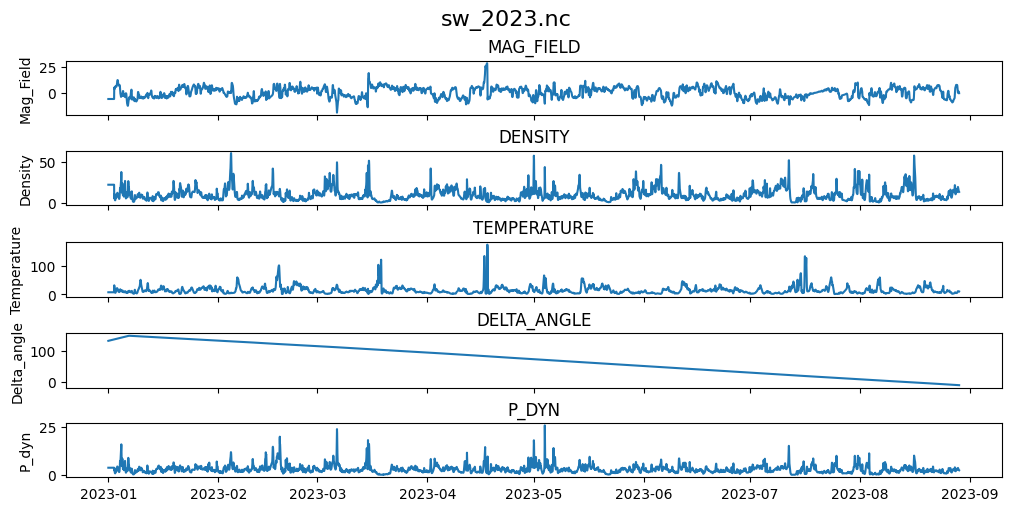

In [5]:
parameters = list(nc2df_variables_dict.keys())
parameters.remove('Time')

_figsize=(10,5)
fig, axs = plt.subplots(len(parameters),
                        constrained_layout=True, sharex=True, sharey=False,
                        figsize=_figsize)
fig.suptitle(nc_filename, fontsize=16)


# for that parameter, plot all datasets
for i, param_name in enumerate(parameters):
    
    axs[i].plot(df[param_name])
    title = f"{param_name}"
    title = title.upper()
    axs[i].set_title(title)
    axs[i].set_ylabel(param_name)
